- Implement k-means algorithm by Numpy.

- Use "Wine dataset" below and choose 2 features according to your preference. Run the k-means algorithm built in the first question. Try 3 different numbers of cluster and visualize the clustering result to see if there is any difference.

- Read and understand how to choose the optimal number of cluster (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/). Draw the elbow for the whole "Wine" dataset (all features).

- Read the limitation of k-means (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three examples that k-means doesn't work.

- [Optional] You learnt about what is k-means++. Explain how k-means++ works AND implement k-means++ algo as you wish.

****

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1: Implement K-means algorithm from scratch

### Iterative optimization 
**1. Ininitallize cluster centers (e.g. randomly)**

**2. Repeat until convergence:**
- Update cluster labels ($r_i$) : Assign points to the nearest cluster center.
- Update cluster centers - centroids ($\mu_i$): Set center to the mean of each cluster.

In [86]:
class KMeans:
    def __init__(self, K=5, max_iters = 100, plot_steps = False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)] 

        # the centers (mean vectors) for each cluster
        self.centroids = []

    
    def _create_clusters(self, centroids):
        '''Assign the samples to the closet centroids'''
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closet_cetroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        
        return clusters

    def _closet_cetroid(self, sample, centroids):
        # euclide distance of the current sample to each centroid
        distances = [self.__euclide_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        
        return closest_idx

    def __euclide_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def _get_centroids(self, clusters):
        '''Assign mean value of clusters to centroids'''
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        
        return centroids

    def _is_converged(self, centroids_old, centroids_new):
        '''
        Check distances between old and new centroids for all centroids
        If no more distances, return True
          '''
       
        distances = [self.__euclide_distance(centroids_old[i], centroids_new[i])\
                     for i in range(self.K)]
        
        return sum(distances) == 0


    def _get_cluster_labels(self, clusters):
        '''Each sample will get the label of the cluster it was assigned to'''
        labels = np.empty(self.n_samples)
        for cluster_idx, clusters in enumerate(clusters):
            for sample_idx in clusters:
                labels[sample_idx] = cluster_idx
        
        return labels
    

    def predict(self, X):
       self.X = X
       self.n_samples, self.n_features = X.shape

       # initialize 
       random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
       self.centroids = [self.X[idx] for idx in random_sample_idxs]

       # optimize clusters
       for _ in range(self.max_iters):
           # assign samples to closets centroids (create clusters)
           self.clusters = self._create_clusters(self.centroids)

           # calculate new centroids from the clusters
           centroids_old = self.centroids
           self.centroids = self._get_centroids(self.clusters)

           if self._is_converged(centroids_old, self.centroids):
                break
           
           if self.plot_steps:
                self.plot()
        
        
        # classify samples as the index of their clusters
       return self._get_cluster_labels(self.clusters)
           
    def plot(self):
        fig, ax = plt.subplots(figsize = (12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point, marker = 'o',label = f'cluster {i}')
        
        for i,point in enumerate(self.centroids):
            # Draw white circles at cluster centers
            ax.scatter(*point, marker='o', c = 'white',  s = 200, edgecolors='k')
            # Lable clusters
            ax.scatter(*point, marker='$%d$' % i, s = 50, edgecolors='k')
        
        plt.legend()
        plt.show()

    def _within_cluster_sum_of_squares(self):
        '''Method to measures the squared average distance 
        of all the points within a cluster to the cluster centroid'''

        clusters = self.clusters
        centroids = self.centroids

        mean_distance_points_clusters = []
        for i, sample in enumerate(clusters):
            mean_distance_in_cluster = np.sum([self.__euclide_distance(point, centroids[i]) for point in sample])
            mean_distance_points_clusters.append(mean_distance_in_cluster) 
        
        return np.mean(mean_distance_points_clusters)


# Problem 2: Wine Dataset

-  Use "Wine dataset" below and choose 2 features according to your preference. Run the k-means algorithm built in the first question. Try 3 different numbers of cluster and visualize the clustering result to see if there is any difference.

- Read and understand how to choose the optimal number of cluster (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/). Draw the elbow for the whole "Wine" dataset (all features).


In [22]:
wine = pd.read_csv("...\\K-Mean\wine-clustering.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Decide 2 features**

In [48]:
X = wine.loc[:,['Alcohol','Hue']].values
X

array([[14.23 ,  1.04 ],
       [13.2  ,  1.05 ],
       [13.16 ,  1.03 ],
       [14.37 ,  0.86 ],
       [13.24 ,  1.04 ],
       [14.2  ,  1.05 ],
       [14.39 ,  1.02 ],
       [14.06 ,  1.06 ],
       [14.83 ,  1.08 ],
       [13.86 ,  1.01 ],
       [14.1  ,  1.25 ],
       [14.12 ,  1.17 ],
       [13.75 ,  1.15 ],
       [14.75 ,  1.25 ],
       [14.38 ,  1.2  ],
       [13.63 ,  1.28 ],
       [14.3  ,  1.07 ],
       [13.83 ,  1.13 ],
       [14.19 ,  1.23 ],
       [13.64 ,  0.96 ],
       [14.06 ,  1.09 ],
       [12.93 ,  1.03 ],
       [13.71 ,  1.11 ],
       [12.85 ,  1.09 ],
       [13.5  ,  1.12 ],
       [13.05 ,  1.13 ],
       [13.39 ,  0.92 ],
       [13.3  ,  1.02 ],
       [13.87 ,  1.25 ],
       [14.02 ,  1.04 ],
       [13.73 ,  1.19 ],
       [13.58 ,  1.09 ],
       [13.68 ,  1.23 ],
       [13.76 ,  1.25 ],
       [13.51 ,  1.1  ],
       [13.48 ,  1.04 ],
       [13.28 ,  1.09 ],
       [13.05 ,  1.12 ],
       [13.07 ,  1.18 ],
       [14.22 ,  0.89 ],


**Dataset Original Visualize**


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


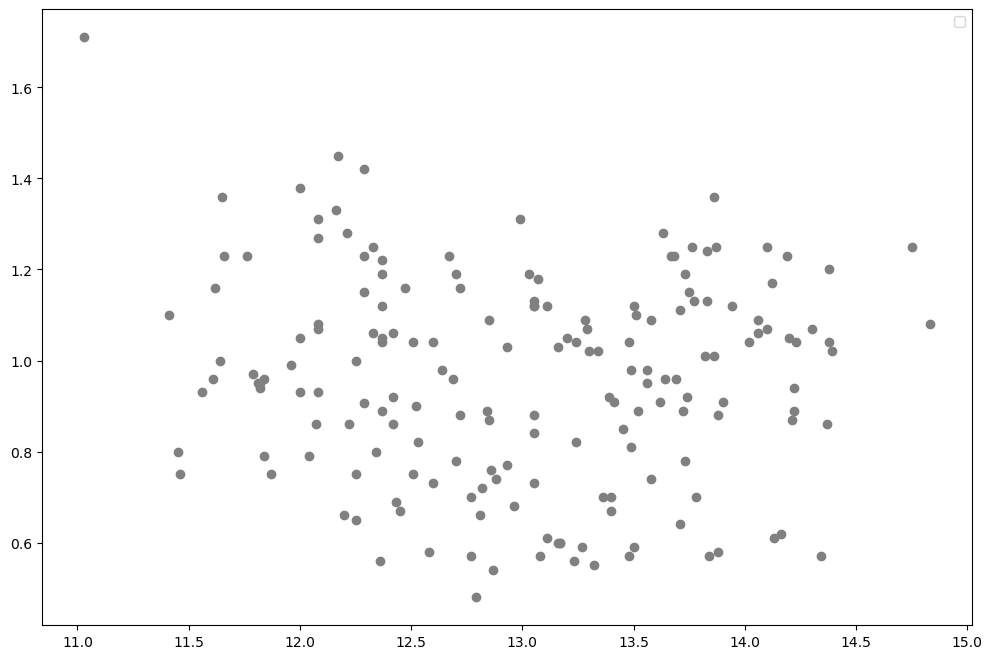

In [58]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(*X.T, color = 'gray')

plt.legend()
plt.show()

**K-Means with 2 clusters**

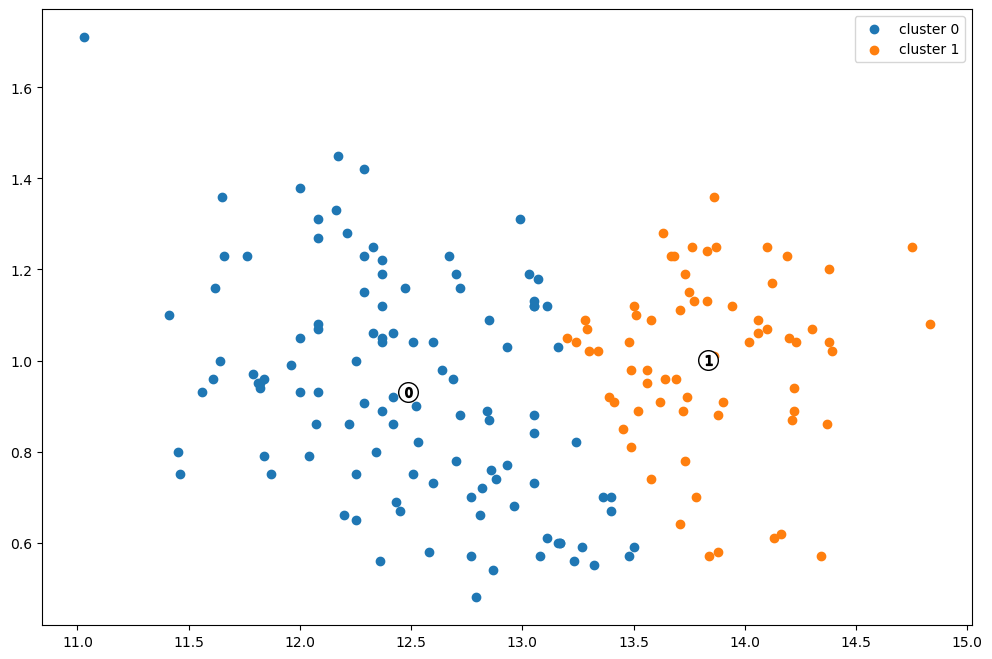

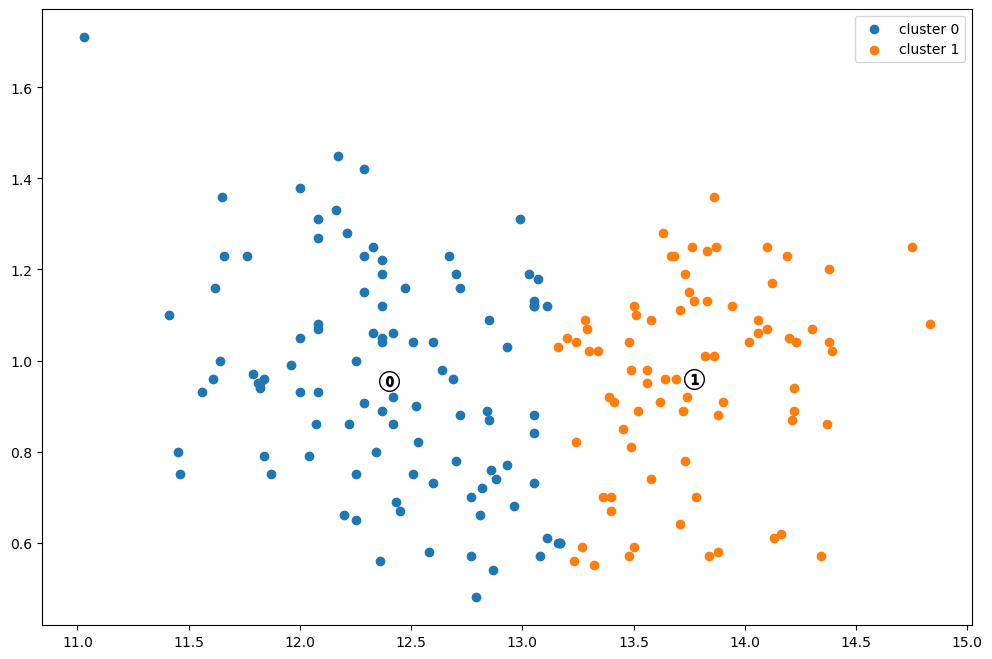

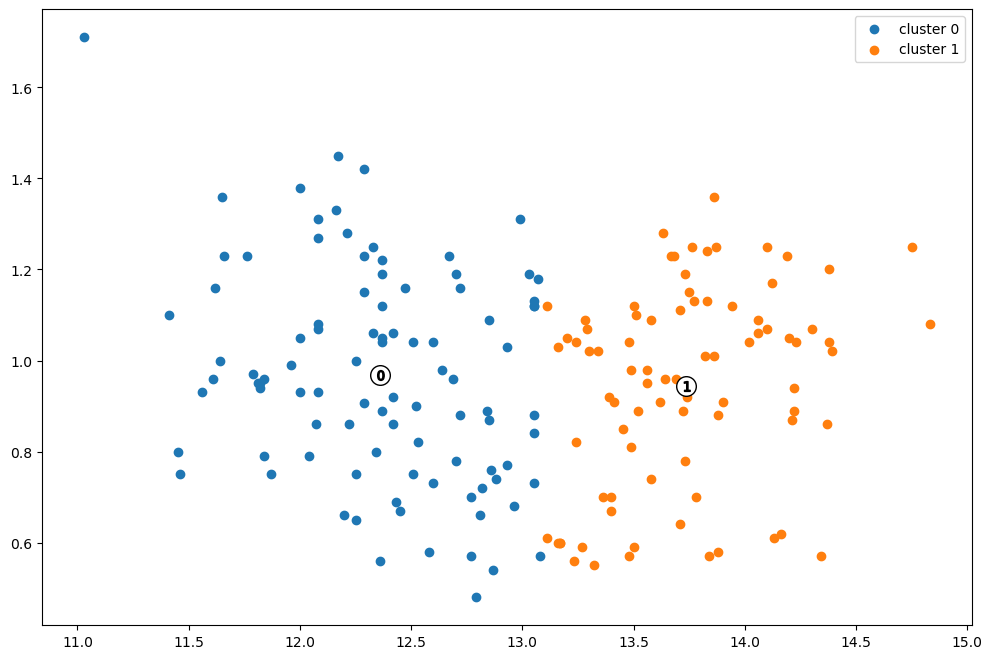

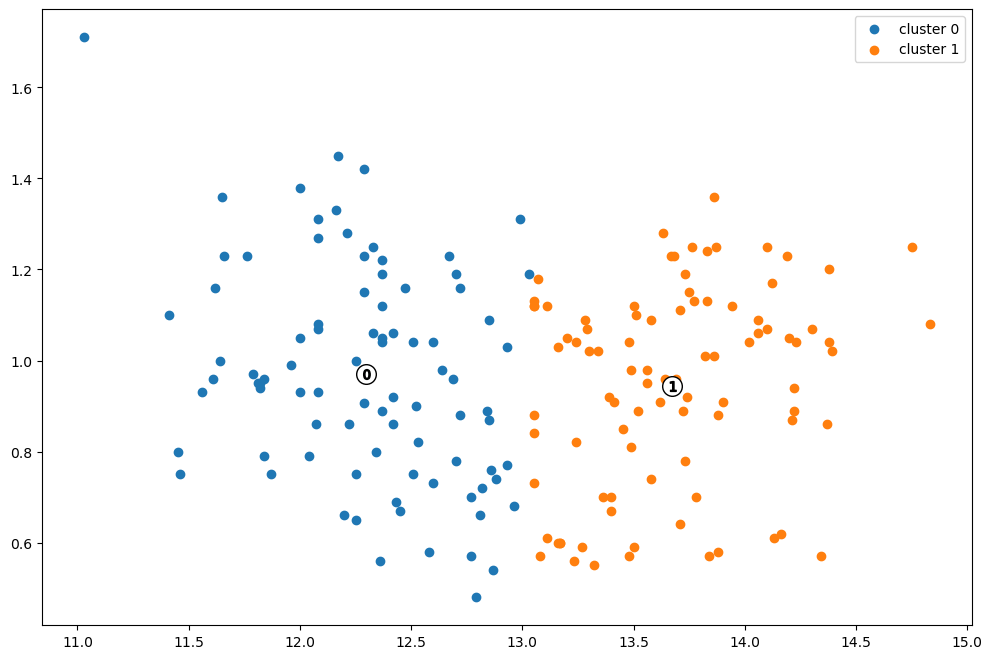

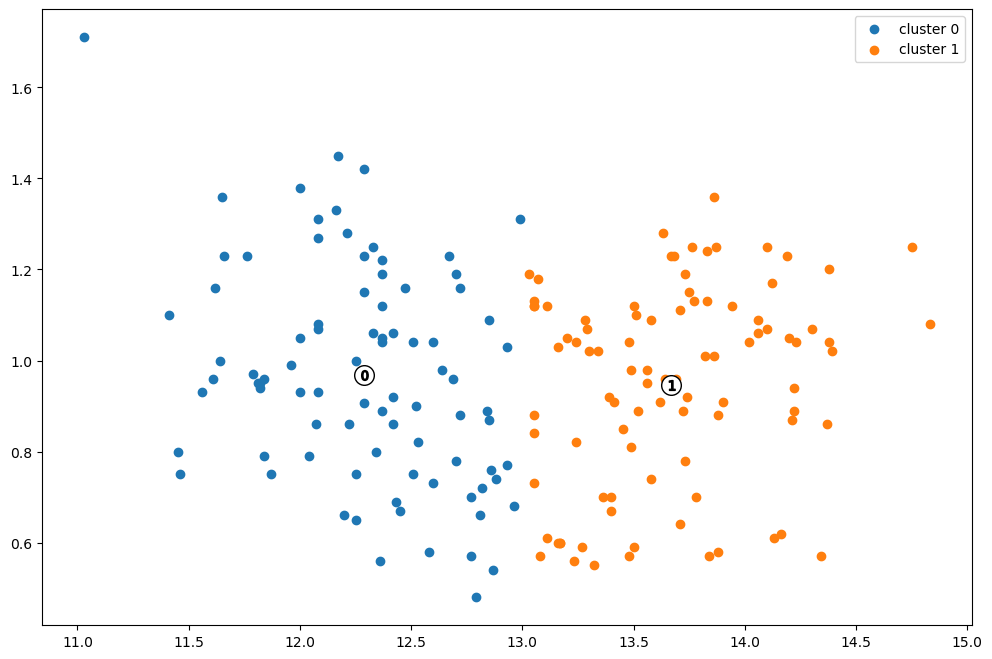

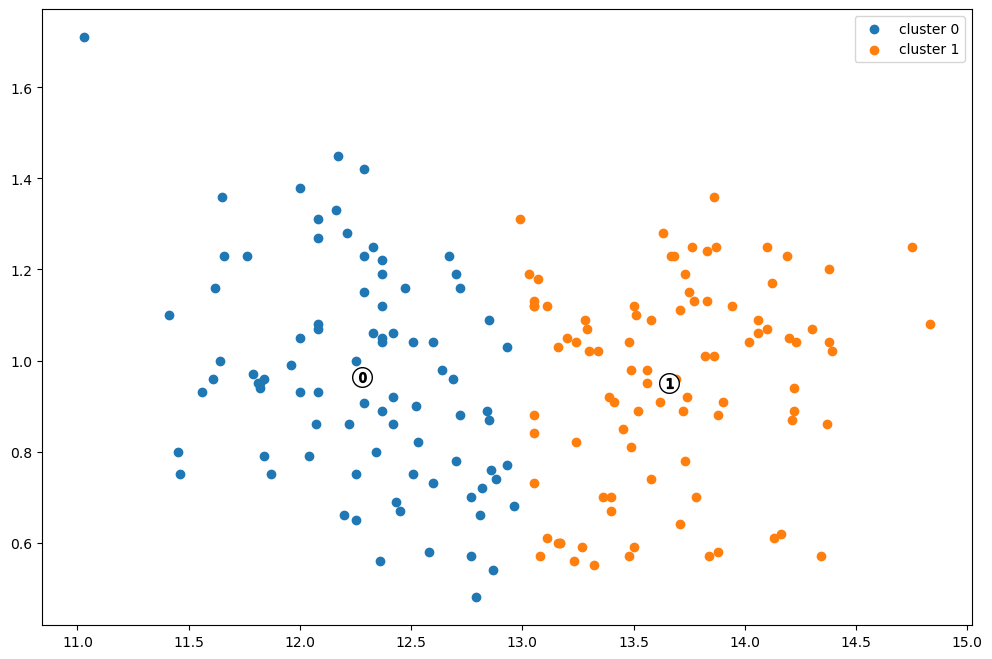

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1.])

In [65]:
kmeans_2 = KMeans(K=2, max_iters=150, plot_steps= True)
kmeans_2.predict(X)

**K-Means with 3 clusters**

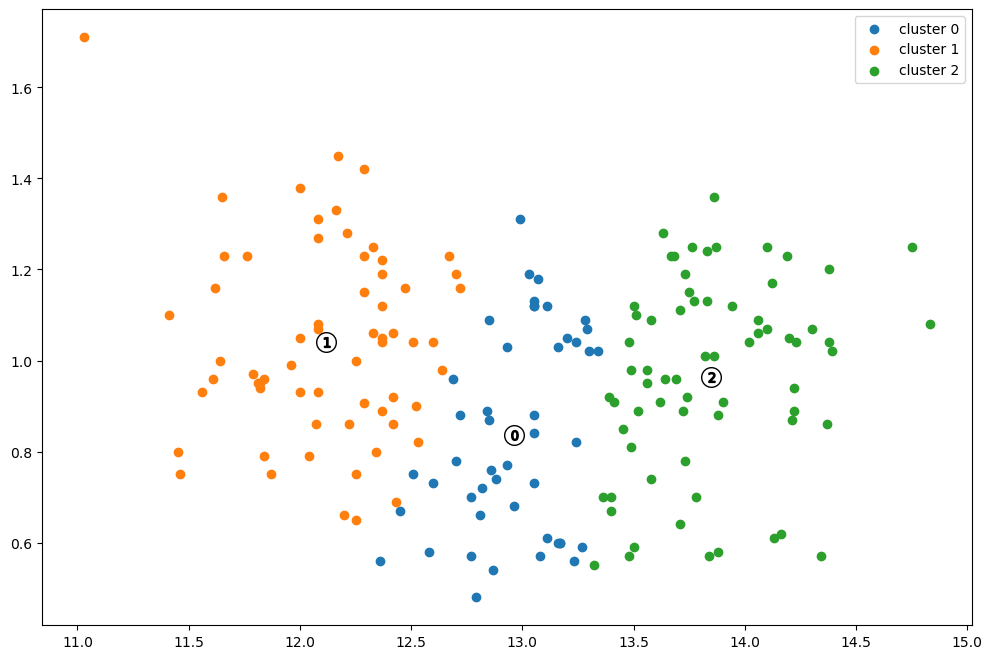

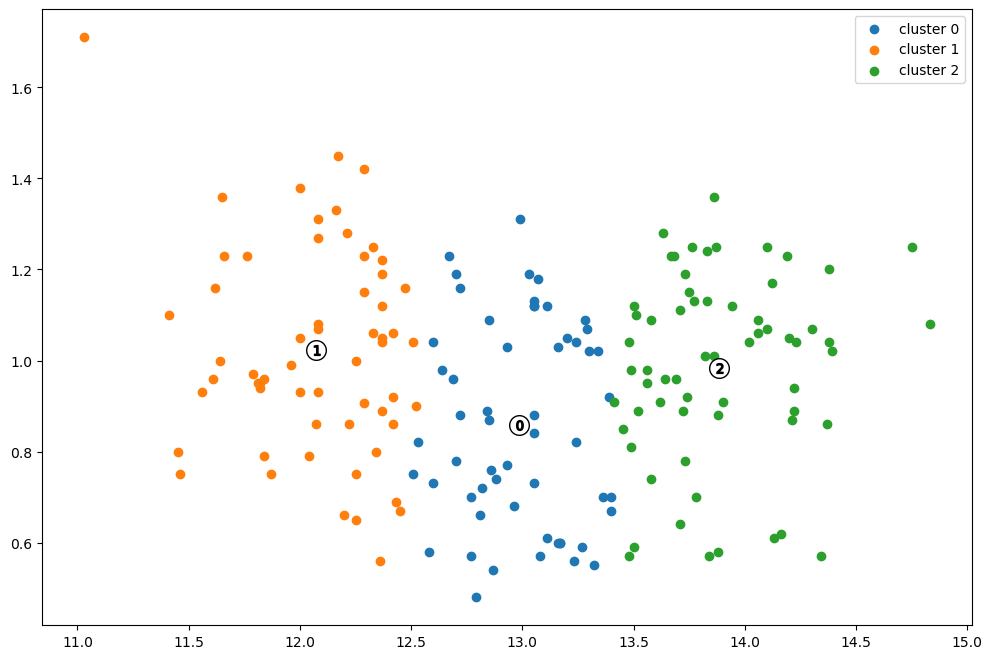

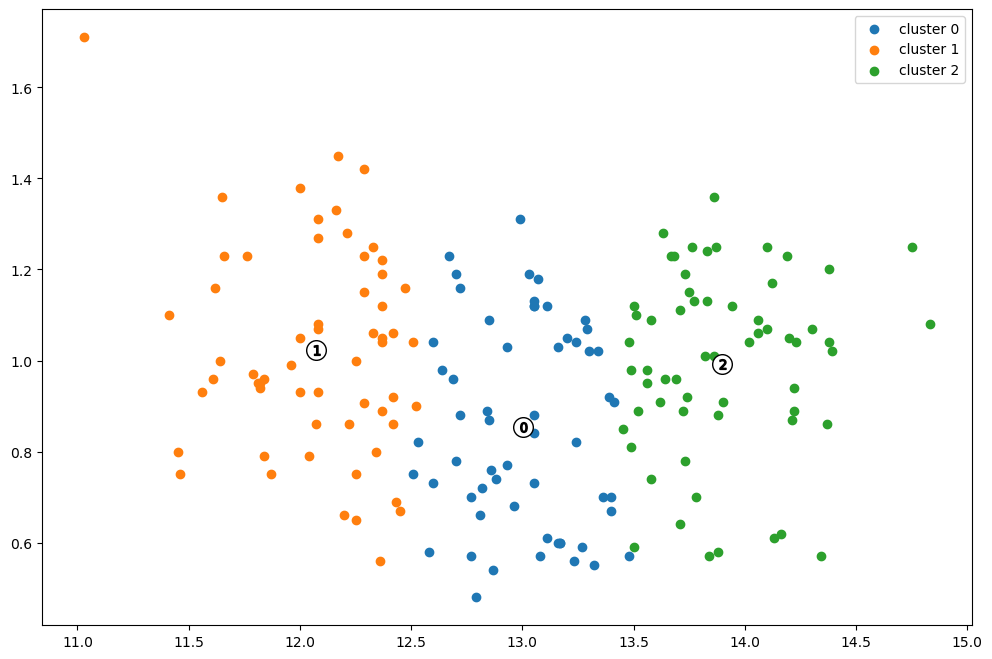

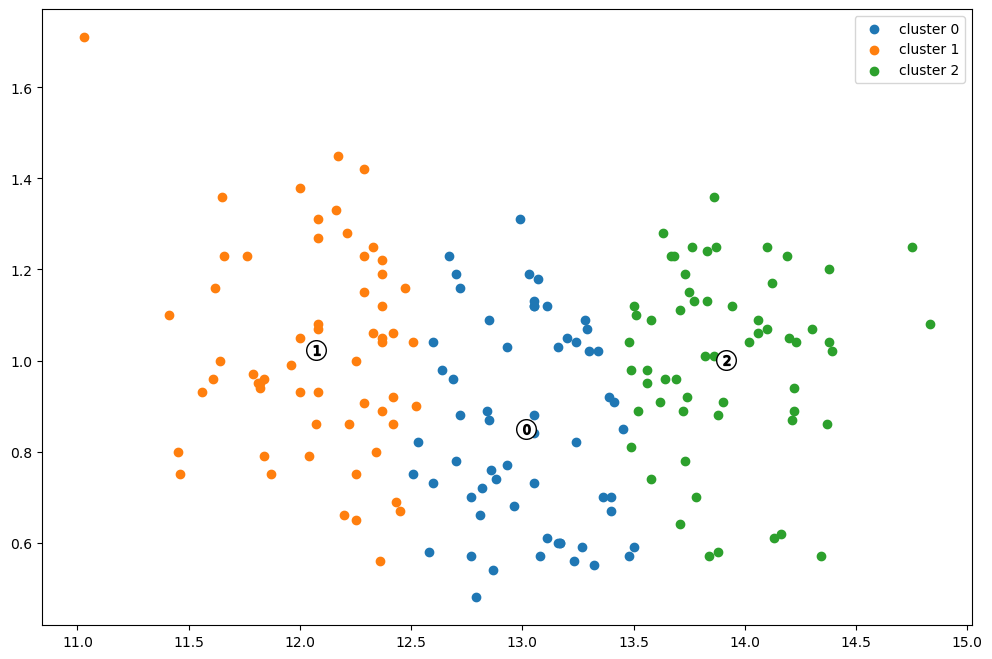

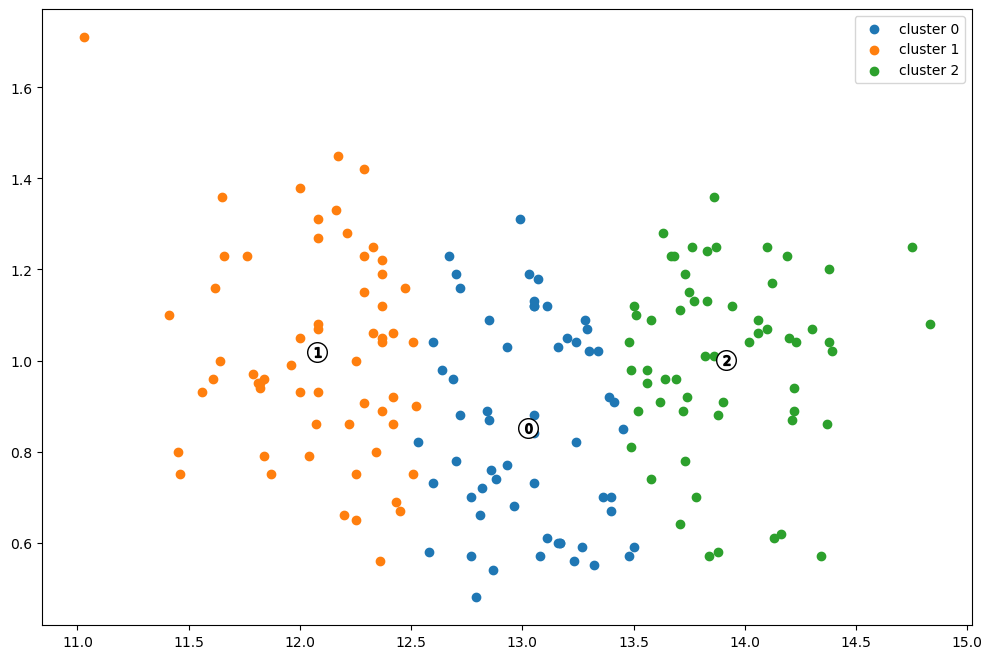

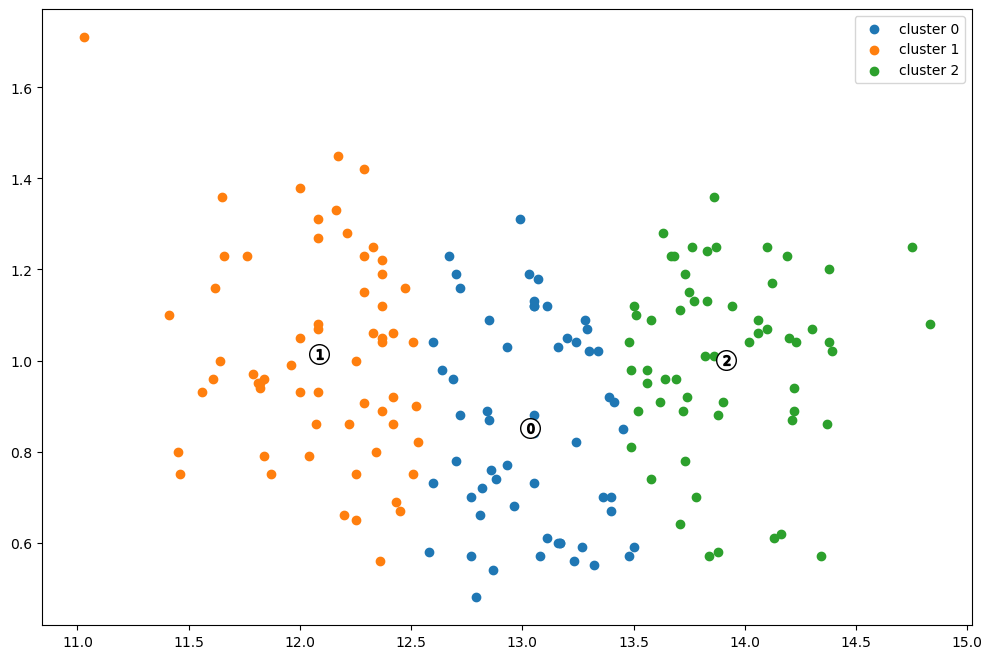

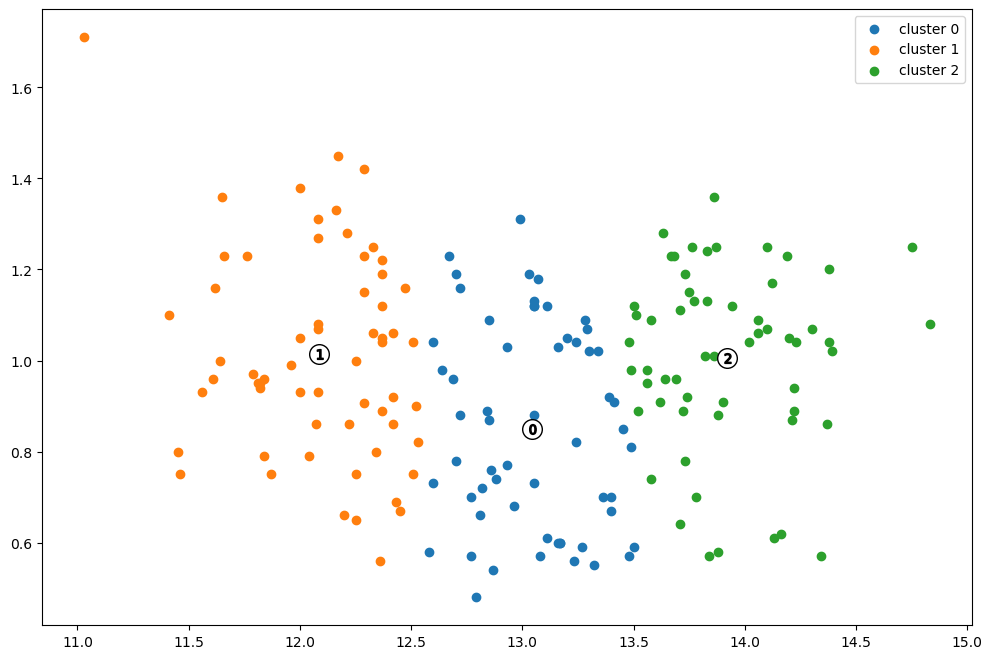

array([2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 2., 0., 2., 0., 0., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 0., 2., 2., 0., 2., 0., 0., 2., 2., 2., 2., 2., 0.,
       2., 2., 2., 2., 2., 2., 0., 2., 1., 1., 0., 2., 1., 1., 1., 0., 1.,
       0., 1., 1., 2., 2., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 1., 2., 0., 1., 2., 0., 0., 2., 2., 0., 0., 2., 0.,
       1., 0., 2., 2., 0., 0., 0., 2.])

In [66]:
kmeans_3 = KMeans(K=3, max_iters=150, plot_steps=True)
kmeans_3.predict(X)

**K-Means with 5 clusters**

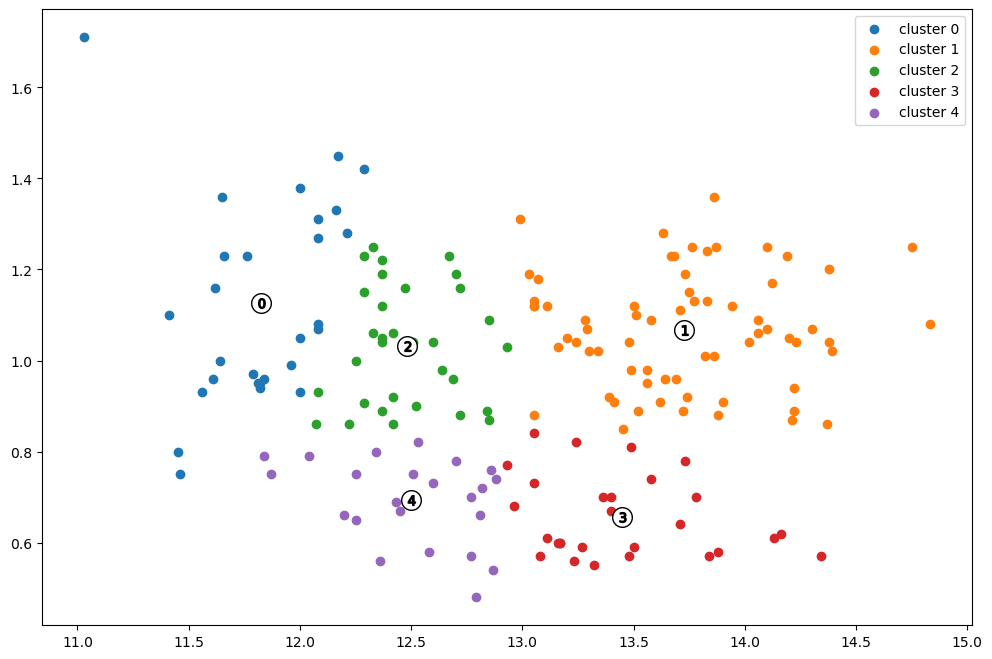

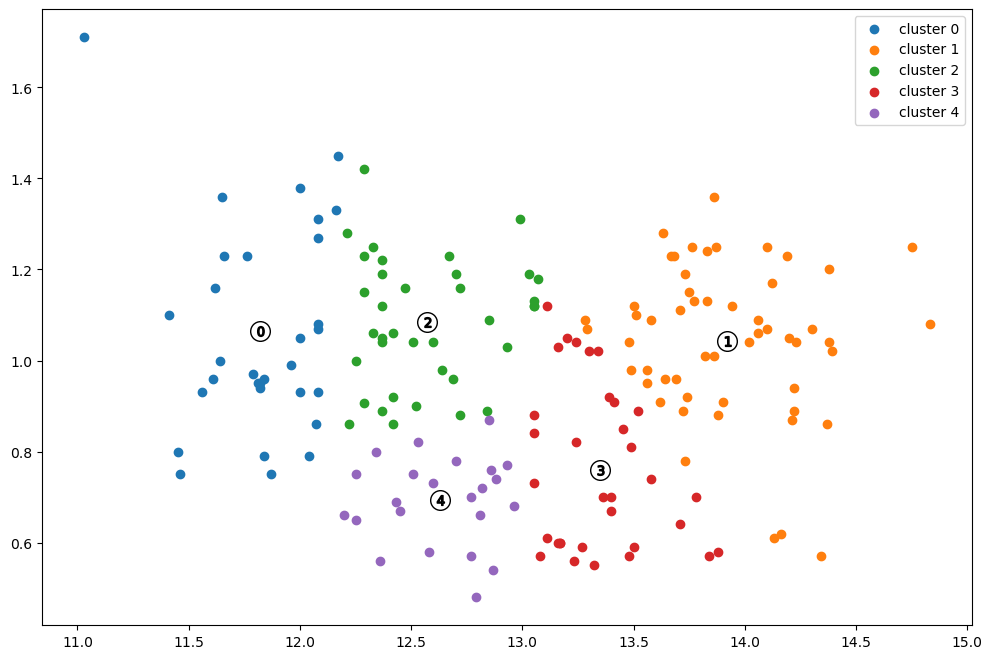

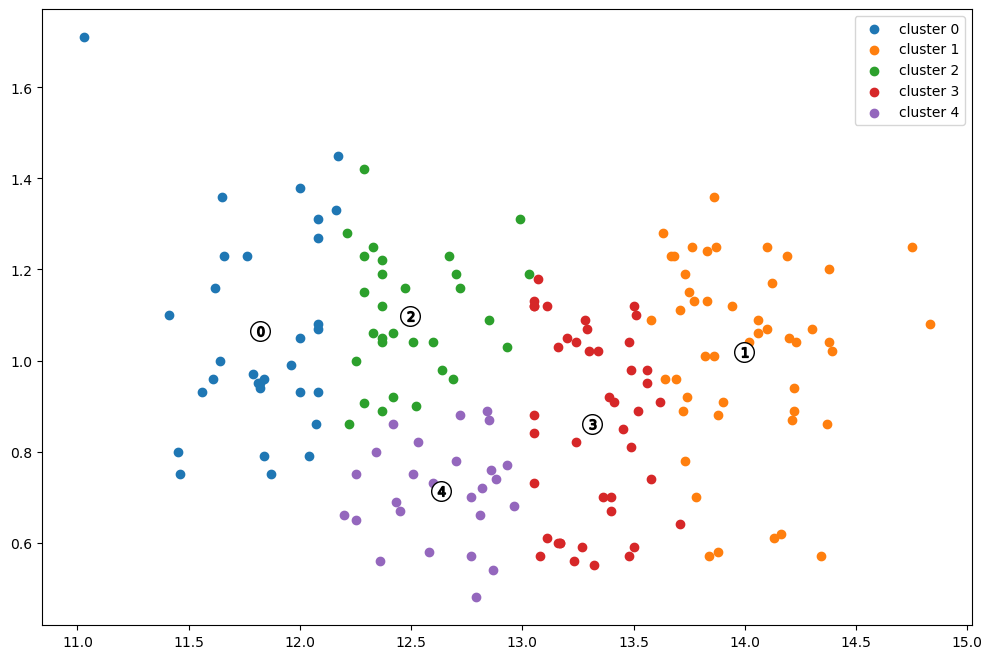

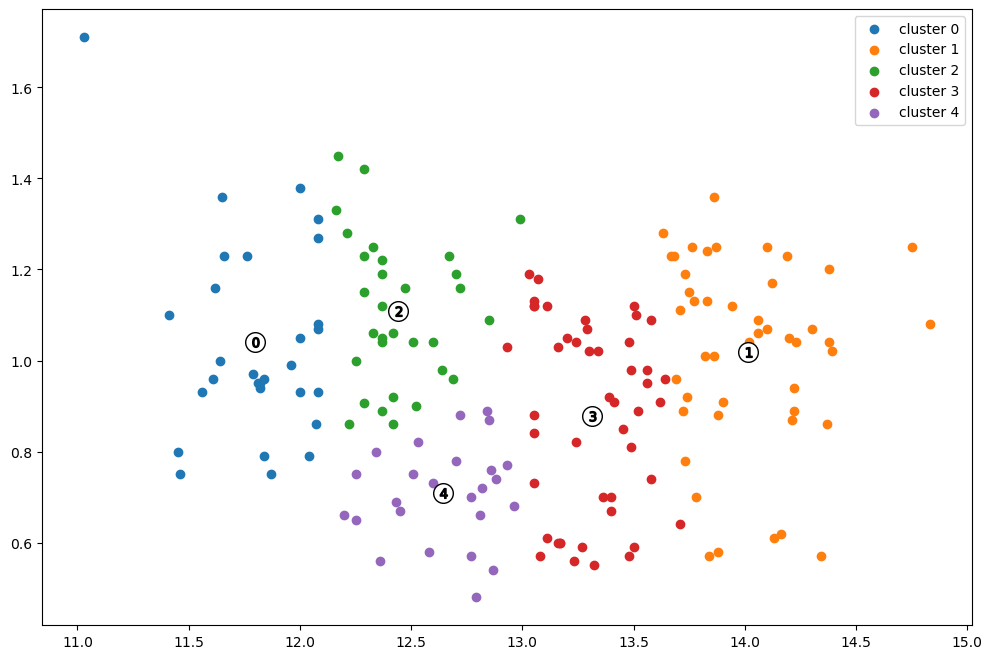

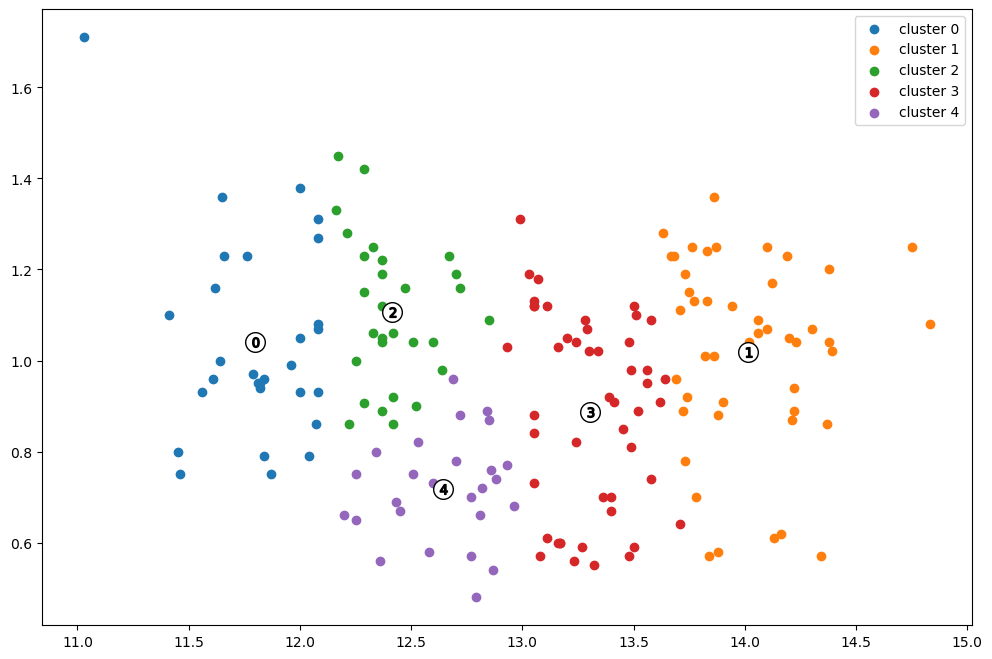

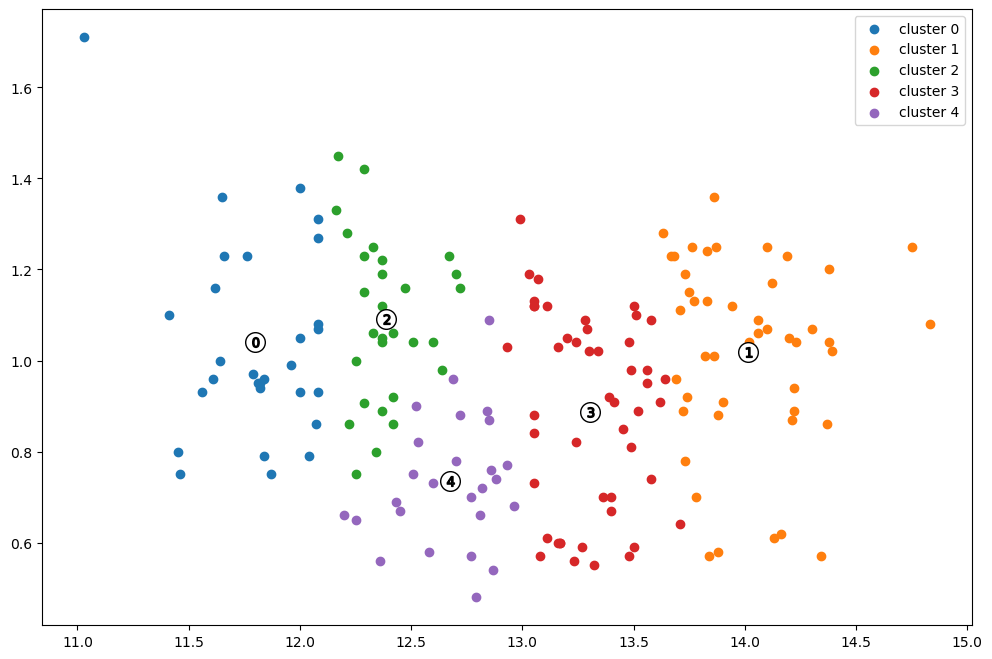

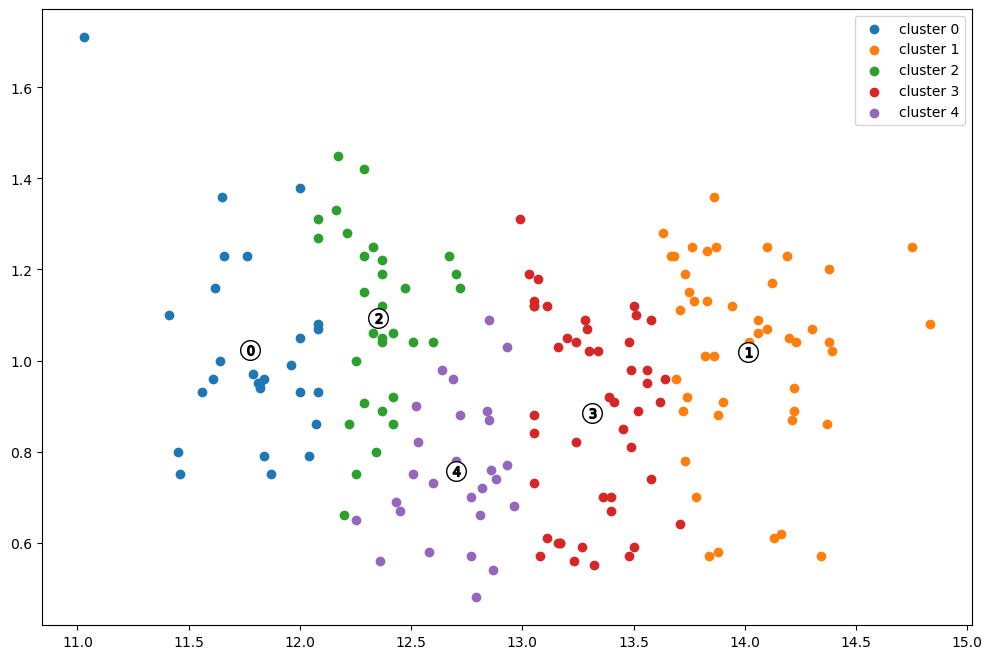

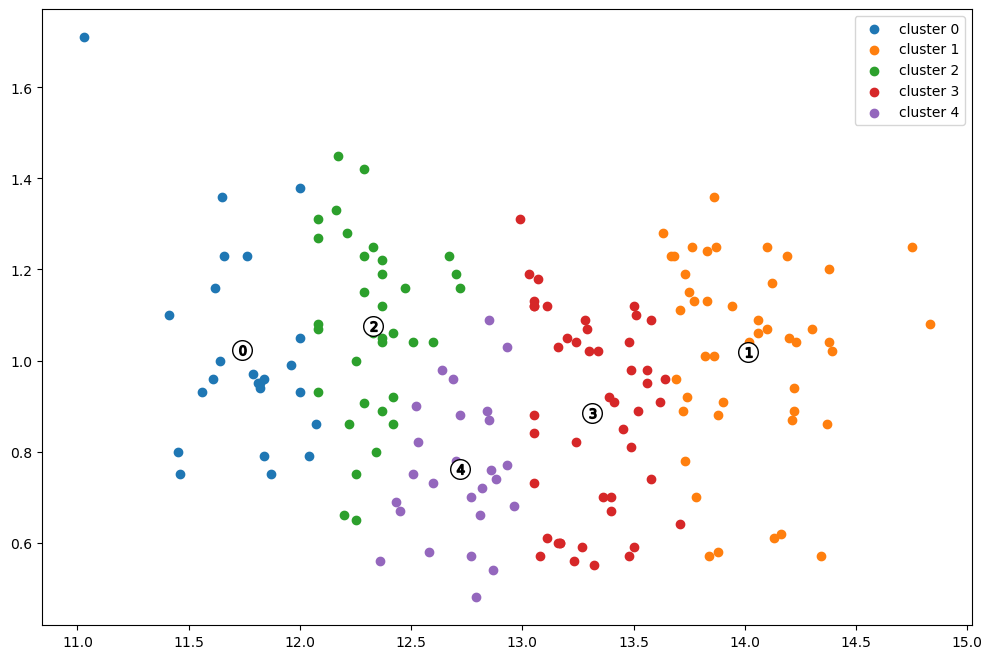

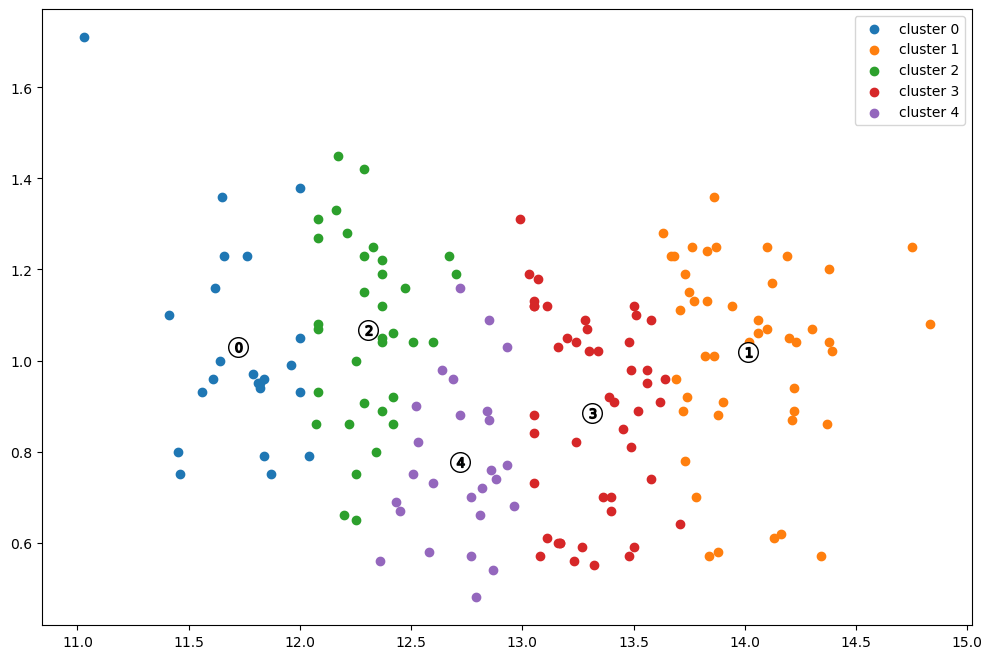

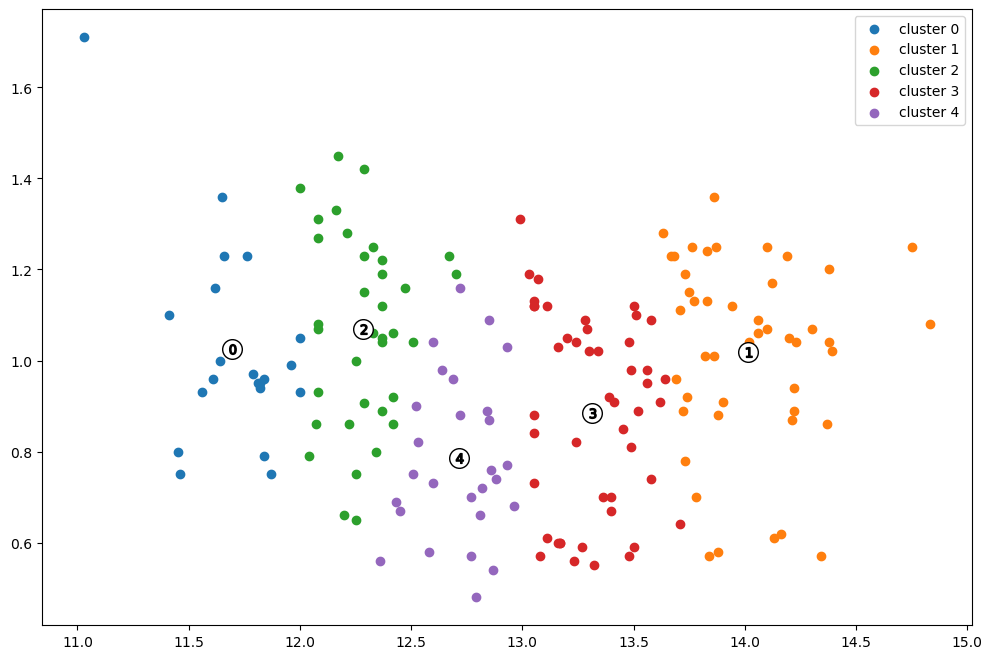

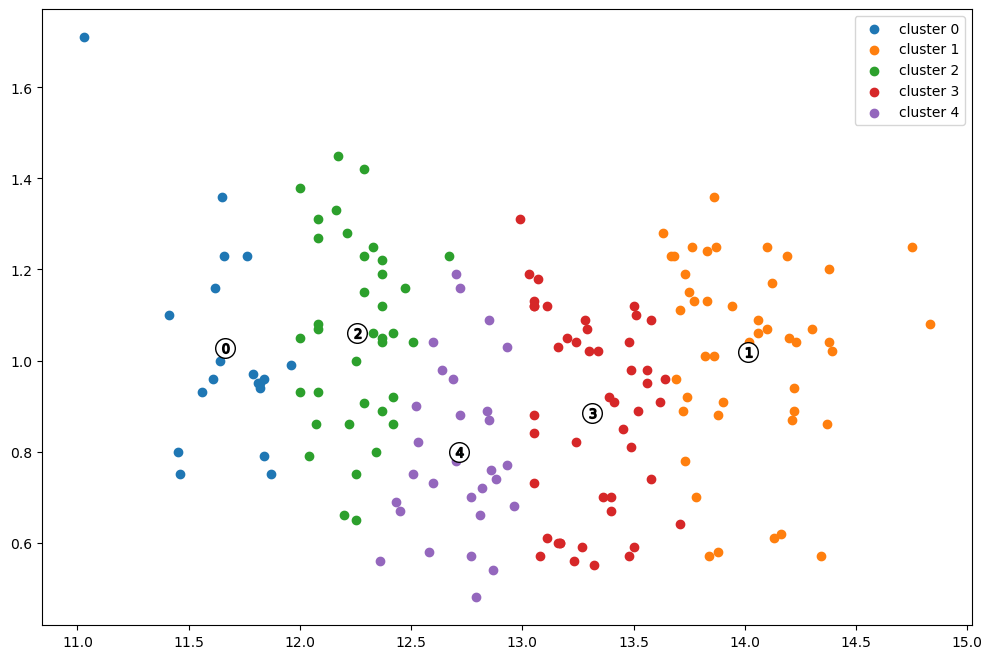

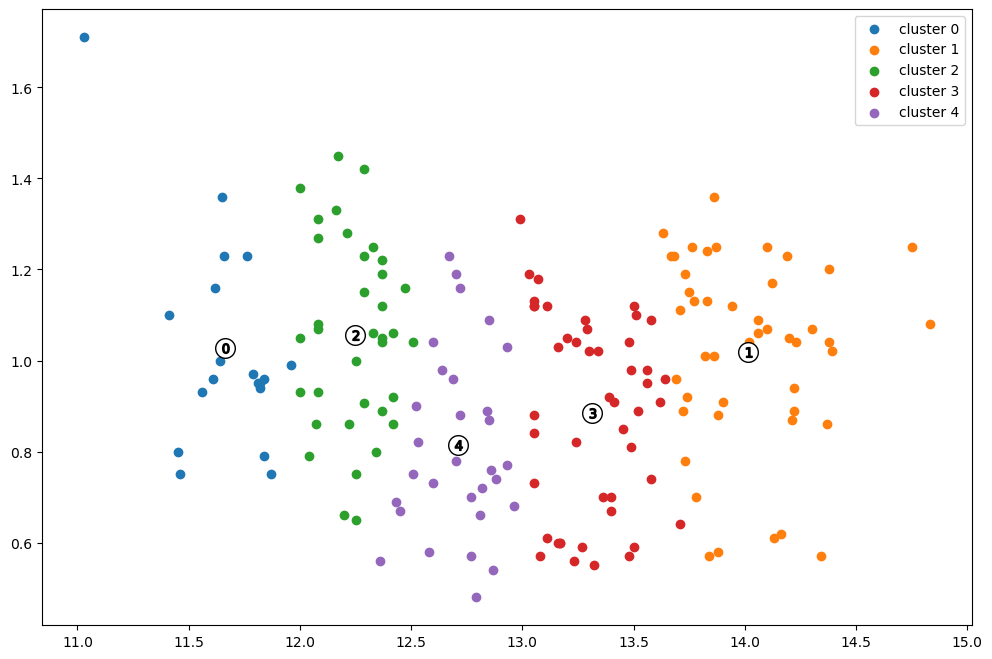

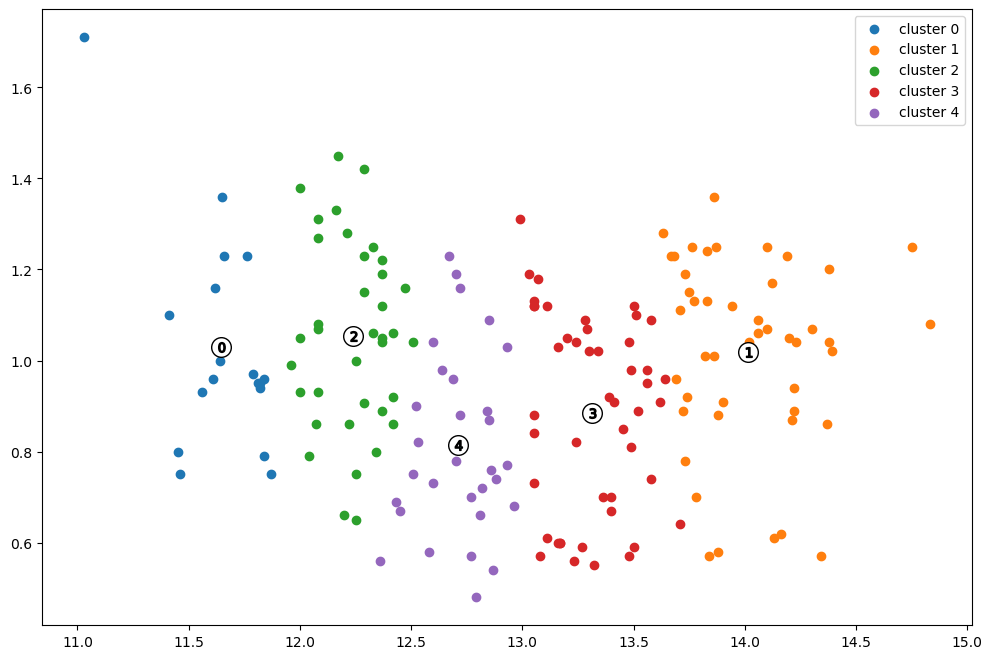

array([1., 3., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 4., 1., 4., 3., 3., 3., 3., 1., 1., 1., 3., 1., 1.,
       3., 3., 3., 3., 3., 1., 3., 3., 1., 3., 3., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 3., 1., 3., 1., 2., 2., 4., 1., 2., 2., 2., 3., 2.,
       3., 2., 2., 1., 3., 3., 2., 0., 3., 0., 2., 4., 2., 4., 2., 3., 0.,
       4., 2., 0., 0., 2., 2., 2., 4., 2., 0., 2., 0., 2., 2., 2., 2., 4.,
       2., 0., 2., 2., 2., 4., 2., 0., 0., 4., 0., 0., 2., 0., 0., 2., 4.,
       2., 0., 0., 2., 3., 0., 2., 4., 0., 2., 2., 4., 4., 4., 4., 4., 4.,
       2., 4., 3., 4., 4., 3., 3., 3., 2., 3., 1., 4., 3., 3., 3., 4., 3.,
       3., 4., 3., 1., 4., 1., 3., 4., 1., 4., 4., 1., 1., 3., 4., 3., 3.,
       2., 4., 1., 3., 3., 3., 3., 1.])

In [67]:
kmeans_5 = KMeans(K=5, max_iters=150, plot_steps=True)
kmeans_5.predict(X)

# Problem 3: Elbow Curve Method

####  Draw Elbow for the whole Wine Dataset (All features)

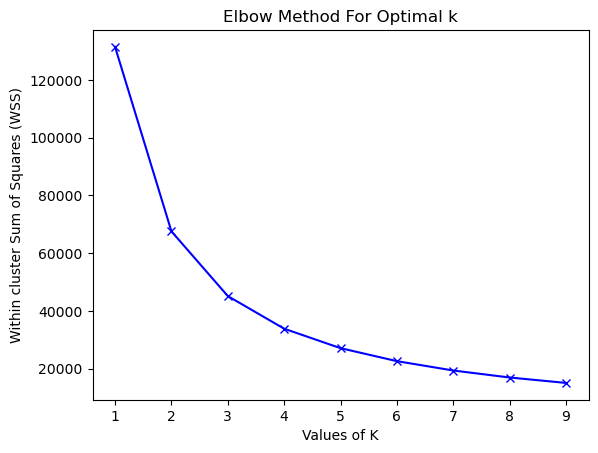

In [87]:
WSS = []
K = range(1,10)
for num_cluster in K:
    kmeans = KMeans(K = num_cluster,max_iters=200,plot_steps= False)
    kmeans.predict(wine.values)
    WSS.append(kmeans._within_cluster_sum_of_squares())

plt.plot(K, WSS, 'bx-')
plt.xlabel("Values of K")
plt.ylabel('Within cluster Sum of Squares (WSS)')
plt.title("Elbow Method For Optimal k")
plt.show()